In [327]:
import pandas as pd
import requests
import json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
sns.set(color_codes=True)

%matplotlib inline

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
with open('recipes_dict.json', 'r') as file:
    recipes_dict = json.loads(file.read())

#### Transform dictionary into a DataFrame

In [3]:
recipes_df = pd.DataFrame.from_dict(recipes_dict, orient='columns', dtype=None).T.fillna(0)

In [4]:
recipes_df['calories'] = recipes_df[['calories']].apply(pd.to_numeric)
recipes_df['carbohydrates'] = recipes_df[['carbohydrates']].apply(pd.to_numeric)
recipes_df['protein'] = recipes_df[['protein']].apply(pd.to_numeric)
recipes_df['serving'] = recipes_df[['serving']].apply(pd.to_numeric)
recipes_df['cholesterol'] = recipes_df[['cholesterol']].apply(pd.to_numeric)
recipes_df['sodium'] = recipes_df[['sodium']].apply(pd.to_numeric)

In [5]:
cooking_time = [x for x in recipes_df['cooking_time']]
cooking_time_corrected = []
for i in cooking_time:
    try:
        i = int(i)
        if i < 7:
            i = i * 60
    except:
        i = 0
    cooking_time_corrected.append(i)
#for i in cooking_time_corrected:
    
recipes_df['cooking_time'] = cooking_time_corrected

In [6]:
attributes = [x for x in recipes_df.columns]
len(attributes)

331

In [7]:
recipes_df

,Almond,Anchovy,Anise,Apple,Apple Juice,Apricot,Artichoke,Arugula,Asian Pear,Asparagus,...,cooking_time,date,make_it_again,protein,rating,reviews_count,serving,sodium,turkey,url
"""Antipasto"" Pasta with Sausage, Artichoke Hearts, and Sun-Dried Tomatoes",0,0,0,0,0,0,1,0,0,0,...,25,November 2017,0.00,26,0.0,0,4,974,0,https://www.epicurious.com/recipes/food/views/...
"""Bloody Mary"" Tomato Toast with Celery and Horseradish",0,0,0,0,0,0,0,0,0,0,...,15,July 2015,1.00,2,4.0,2,6,344,0,https://www.epicurious.com/recipes/food/views/...
"""Bow-Tie"" Pasta with Zucchini",0,0,0,0,0,0,0,0,0,0,...,0,July 1999,0.93,17,3.5,48,4,759,0,https://www.epicurious.com/recipes/food/views/...
"""Cromlet"" With Wilted Greens and Fennel and Olive Salad",0,0,0,0,0,0,0,0,0,0,...,0,February 2017,1.00,24,4.0,1,2,913,0,https://www.epicurious.com/recipes/food/views/...
"""Nextover"" Chicken Tacos with Quick Refried Beans",0,0,0,0,0,0,0,0,0,0,...,20,January 2017,0.67,65,3.0,3,2,1632,0,https://www.epicurious.com/recipes/food/views/...
"""No Nightmare"" Beef Wellington",0,0,0,0,0,0,0,0,0,0,...,0,August 2008,0.71,0,3.5,15,0,0,0,https://www.epicurious.com/recipes/food/views/...
"""Pizza"" Sandwiches",0,0,0,0,0,0,0,1,0,0,...,0,September 2009,1.00,34,3.0,5,4,1828,0,https://www.epicurious.com/recipes/food/views/...
"""Tomato Time"" Tart",0,0,0,0,0,0,0,0,0,0,...,0,August 2002,0.75,0,3.0,4,0,0,0,https://www.epicurious.com/recipes/food/views/...
"'Wichcraft's Roasted Turkey, Avocado, Bacon, Onion Relish, & Aïoli on Ciabatta",0,0,0,0,0,0,0,0,0,0,...,0,December 2006,1.00,55,4.0,20,4,1291,1,https://www.epicurious.com/recipes/food/views/...
10-Minute Chicken Flatbreads with Hummus and Yogurt,0,0,0,0,0,0,0,0,0,0,...,10,August 2017,0.83,35,3.5,6,4,917,0,https://www.epicurious.com/recipes/food/views/...


In [8]:
df_reduced = recipes_df[recipes_df.rating > 0][recipes_df.calories > 10][recipes_df.carbohydrates > 10][recipes_df.protein > 1][recipes_df.serving > 0][recipes_df.sodium > 1][recipes_df.reviews_count > 0][recipes_df.make_it_again > 0][recipes_df.date != 0][recipes_df.cooking_time > 0]

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [328]:
#Eliminate 
ingredients_count = df_reduced.drop(['calories', 'carbohydrates', 'protein', 'rating', 'serving', 'url', 'cholesterol','sodium', 'reviews_count', 'make_it_again', 'date', 'cooking_time','cooking_time'], axis = 1).apply(pd.value_counts).fillna(0)[1:].T
ingredients_count.columns = ['qty']
top_ingredients = ingredients_count.sort_values(by = ['qty'], ascending = False).head(200)

In [10]:
recipes_df_reduced = df_reduced[['calories', 'carbohydrates', 'protein', 'rating', 'serving', 'url', 'cholesterol','sodium', 'reviews_count', 'make_it_again', 'date', 'cooking_time']]
df_top_ingredients = df_reduced[top_ingredients.index]
df_top_ingredients

,Tomato,Chicken,Pasta,Cheese,Egg,Vegetable,Potato,Onion,Garlic,Pork,...,Sesame,Coffee,Port,Mussel,Orange Juice,Cod,Okra,Fig,Quinoa,Trout
"""Nextover"" Chicken Tacos with Quick Refried Beans",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10-Minute Chicken Flatbreads with Hummus and Yogurt,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10-Minute Sausage Skillet with Cherry Tomatoes and Broccolini,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10-Minute Shrimp with Green Beans and Creamy Lemon-Dill Dip,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Cacio e Pepe (Pasta With Cheese and Pepper),0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Creamy Pumpkin Pasta,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"3-Ingredient Grilled Steak, Pineapple, and Avocado Salad",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Ice Cream French Toast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Orecchiette with Sausage and Fennel,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Sausage Dinner With Lentils and Fennel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_pre = pd.merge(recipes_df_reduced, df_top_ingredients, left_index=True, right_index=True)
df_pre

,calories,carbohydrates,protein,rating,serving,url,cholesterol,sodium,reviews_count,make_it_again,...,Sesame,Coffee,Port,Mussel,Orange Juice,Cod,Okra,Fig,Quinoa,Trout
"""Nextover"" Chicken Tacos with Quick Refried Beans",1224,65,65,3.0,2,https://www.epicurious.com/recipes/food/views/...,292,1632,3,0.67,...,0,0,0,0,0,0,0,0,0,0
10-Minute Chicken Flatbreads with Hummus and Yogurt,463,42,35,3.5,4,https://www.epicurious.com/recipes/food/views/...,115,917,6,0.83,...,0,0,0,0,0,0,0,0,0,0
10-Minute Sausage Skillet with Cherry Tomatoes and Broccolini,476,20,22,4.0,4,https://www.epicurious.com/recipes/food/views/...,70,1046,11,1.00,...,0,0,0,0,0,0,0,0,0,0
10-Minute Shrimp with Green Beans and Creamy Lemon-Dill Dip,482,18,30,2.5,4,https://www.epicurious.com/recipes/food/views/...,230,1189,3,1.00,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Cacio e Pepe (Pasta With Cheese and Pepper),736,89,35,2.0,4,https://www.epicurious.com/recipes/food/views/...,66,922,5,0.60,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Creamy Pumpkin Pasta,694,91,17,3.0,4,https://www.epicurious.com/recipes/food/views/...,102,508,1,1.00,...,0,0,0,0,0,0,0,0,0,0
"3-Ingredient Grilled Steak, Pineapple, and Avocado Salad",902,39,47,4.0,4,https://www.epicurious.com/recipes/food/views/...,186,838,3,1.00,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Ice Cream French Toast,757,69,13,4.0,2,https://www.epicurious.com/recipes/food/views/...,175,414,1,1.00,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Orecchiette with Sausage and Fennel,500,72,26,4.0,4,https://www.epicurious.com/recipes/food/views/...,26,603,6,1.00,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Sausage Dinner With Lentils and Fennel,510,41,27,4.0,4,https://www.epicurious.com/recipes/food/views/...,25,627,1,1.00,...,0,0,0,0,0,0,0,0,0,0


Text(0,0.5,'# Recipes')

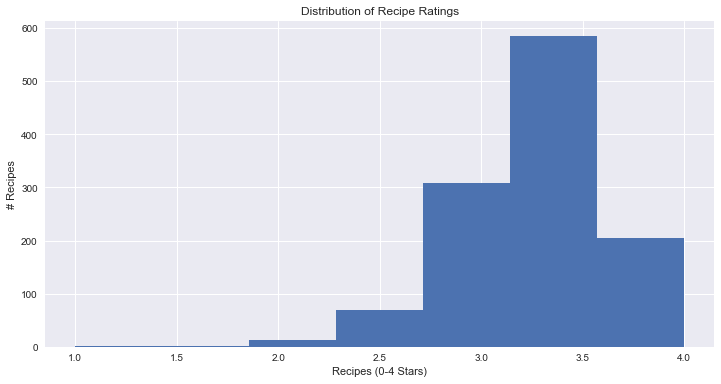

In [12]:
plt.figure(figsize=(12,6))
plt.hist(df_pre['rating'], bins = 7)
plt.title("Distribution of Recipe Ratings")
plt.xlabel('Recipes (0-4 Stars)')
plt.ylabel('# Recipes')

In [13]:
df_pre['success_score'] = df_pre['rating'] * df_pre['make_it_again']

In [14]:
with open('df_pre.pkl', 'wb') as picklefile:
    pickle.dump(df_pre, picklefile)

In [15]:
with open('df_pre1.pkl', 'wb') as picklefile:
    pickle.dump(df_pre, picklefile)

In [472]:
top_recipes = df_pre.sort_values(by = ['success_score'], ascending = False).head(100)
top_recipes_1 = top_recipes[['success_score','rating','calories', 'carbohydrates', 'protein', 'cholesterol','sodium']].describe()
top_recipes_2 = top_recipes.drop(['rating','success_score','url','reviews_count','calories', 'carbohydrates', 'protein', 'cholesterol','sodium','serving','make_it_again','date','cooking_time'], axis =1)
#top_recipes_mean = round(top_recipes_1.loc['mean'].append(top_recipes_2.sum().sort_values(ascending=True).head(10)),2)
top_ingredients = top_recipes_2.sum().sort_values(ascending=False).head(80)

In [471]:
bottom_recipes = df_pre.sort_values(by = ['success_score'], ascending = True).head(100)
bottom_recipes_1 = bottom_recipes[['success_score','rating','calories', 'carbohydrates', 'protein', 'cholesterol','sodium']].describe()
bottom_recipes_2 = bottom_recipes.drop(['rating','success_score','url','reviews_count','calories', 'carbohydrates', 'protein', 'cholesterol','sodium','serving','make_it_again','date','cooking_time'], axis =1)
#bottom_recipes_mean = round(bottom_recipes_1.loc['mean'].append(bottom_recipes_2.sum().sort_values(ascending=True).head(10)),2)
bottom_ingredients = bottom_recipes_2.sum().sort_values(ascending=False).head(80)


In [446]:
comparison_1 = pd.merge(top_recipes_1.loc['mean'].reset_index(),bottom_recipes_1.loc['mean'].reset_index(), on = ['index']).set_index('index')
#comparison_2 = pd.merge(top_recipes_2.sum().sort_values(ascending=True).reset_index(),bottom_recipes_2.sum().sort_values(ascending=True).reset_index(), on = ['index']).set_index('index')
comparison_2 = pd.merge(top_ingredients.reset_index(),bottom_ingredients.reset_index(), on = ['index']).set_index('index')

comparison_1.columns = ['Top Recipes', 'Bottom Recipes']
comparison_2.columns = ['Top Recipes', 'Bottom Recipes']
comparison_1['Comparison'] = round((comparison['Top Recipes'] / comparison['Bottom Recipes']),2)
comparison_2['Comparison'] = round((comparison['Top Recipes'] - comparison['Bottom Recipes']),2)
comparison_2 = comparison_2.sort_values(by = 'Comparison', ascending = False)[comparison_2['Comparison'] != 0]
comparison_1
#comparison_2.drop['Seed']


/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Top Recipes,Bottom Recipes,Comparison
index,,,
success_score,4.00,1.4108,2.84
rating,4.00,2.6400,1.52
calories,703.30,607.4500,1.16
carbohydrates,44.96,53.5100,0.84
protein,39.31,26.6400,1.48
cholesterol,149.61,116.6600,1.28
sodium,978.71,712.3000,1.37


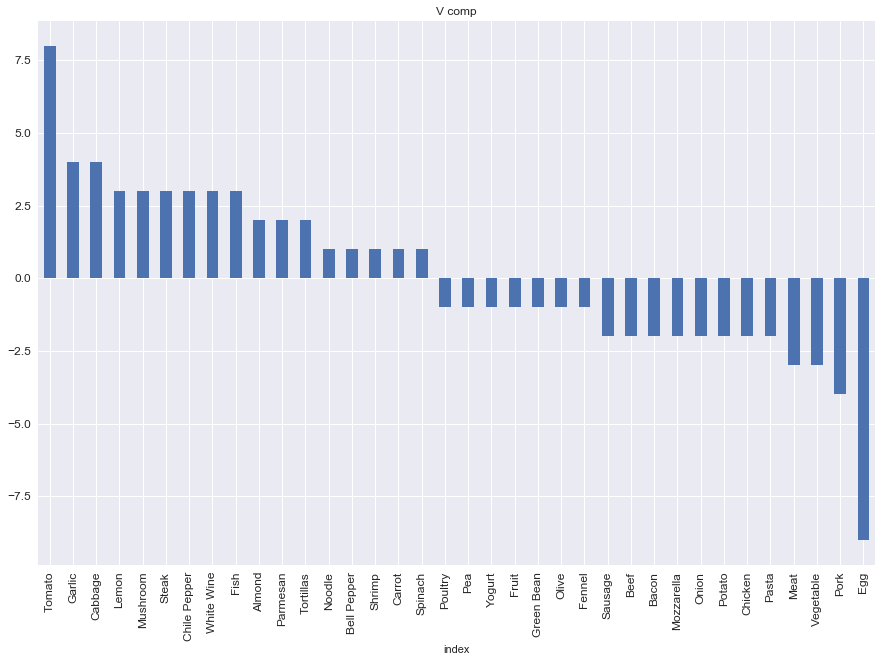

In [321]:
#plt.bar(comparison_2['Comparison'], comparison_2, align='center', alpha=0.5)
ax = comparison_2['Comparison'].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=False, fontsize=12)

In [299]:
#comparison = pd.merge(top_recipes_mean.reset_index(),bottom_recipes_mean.reset_index(), on = ['index']).set_index('index')
#comparison.columns = ['Top Recipes', 'Bottom Recipes']
#comparison['Comparison'] = round((comparison['Top Recipes'] / comparison['Bottom Recipes']),2)
#comparison


In [322]:
#top_recipes_ingr = set(i for i in top_recipes_2.sum().sort_values(ascending=True))
#bottom_recipes_ingr = set(i for i in bottom_recipes_2.sum().sort_values(ascending=True))
#in_common = list(top_recipes_ingr & bottom_recipes_ingr)
#in_common

In [323]:
df_pre = df_pre[df_pre.rating > 0][df_pre.calories > 50][df_pre.calories < 2000][df_pre.carbohydrates > 1][df_pre.carbohydrates < 1000][df_pre.protein > 1][df_pre.protein < 1000][df_pre.cholesterol > 1][df_pre.serving > 0][df_pre.sodium > 1][df_pre.sodium < 2000][df_pre.reviews_count > 0][df_pre.make_it_again > 0][df_pre.date != 0][df_pre.cooking_time > 7][df_pre.cooking_time <360][df_pre.reviews_count > 1]

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


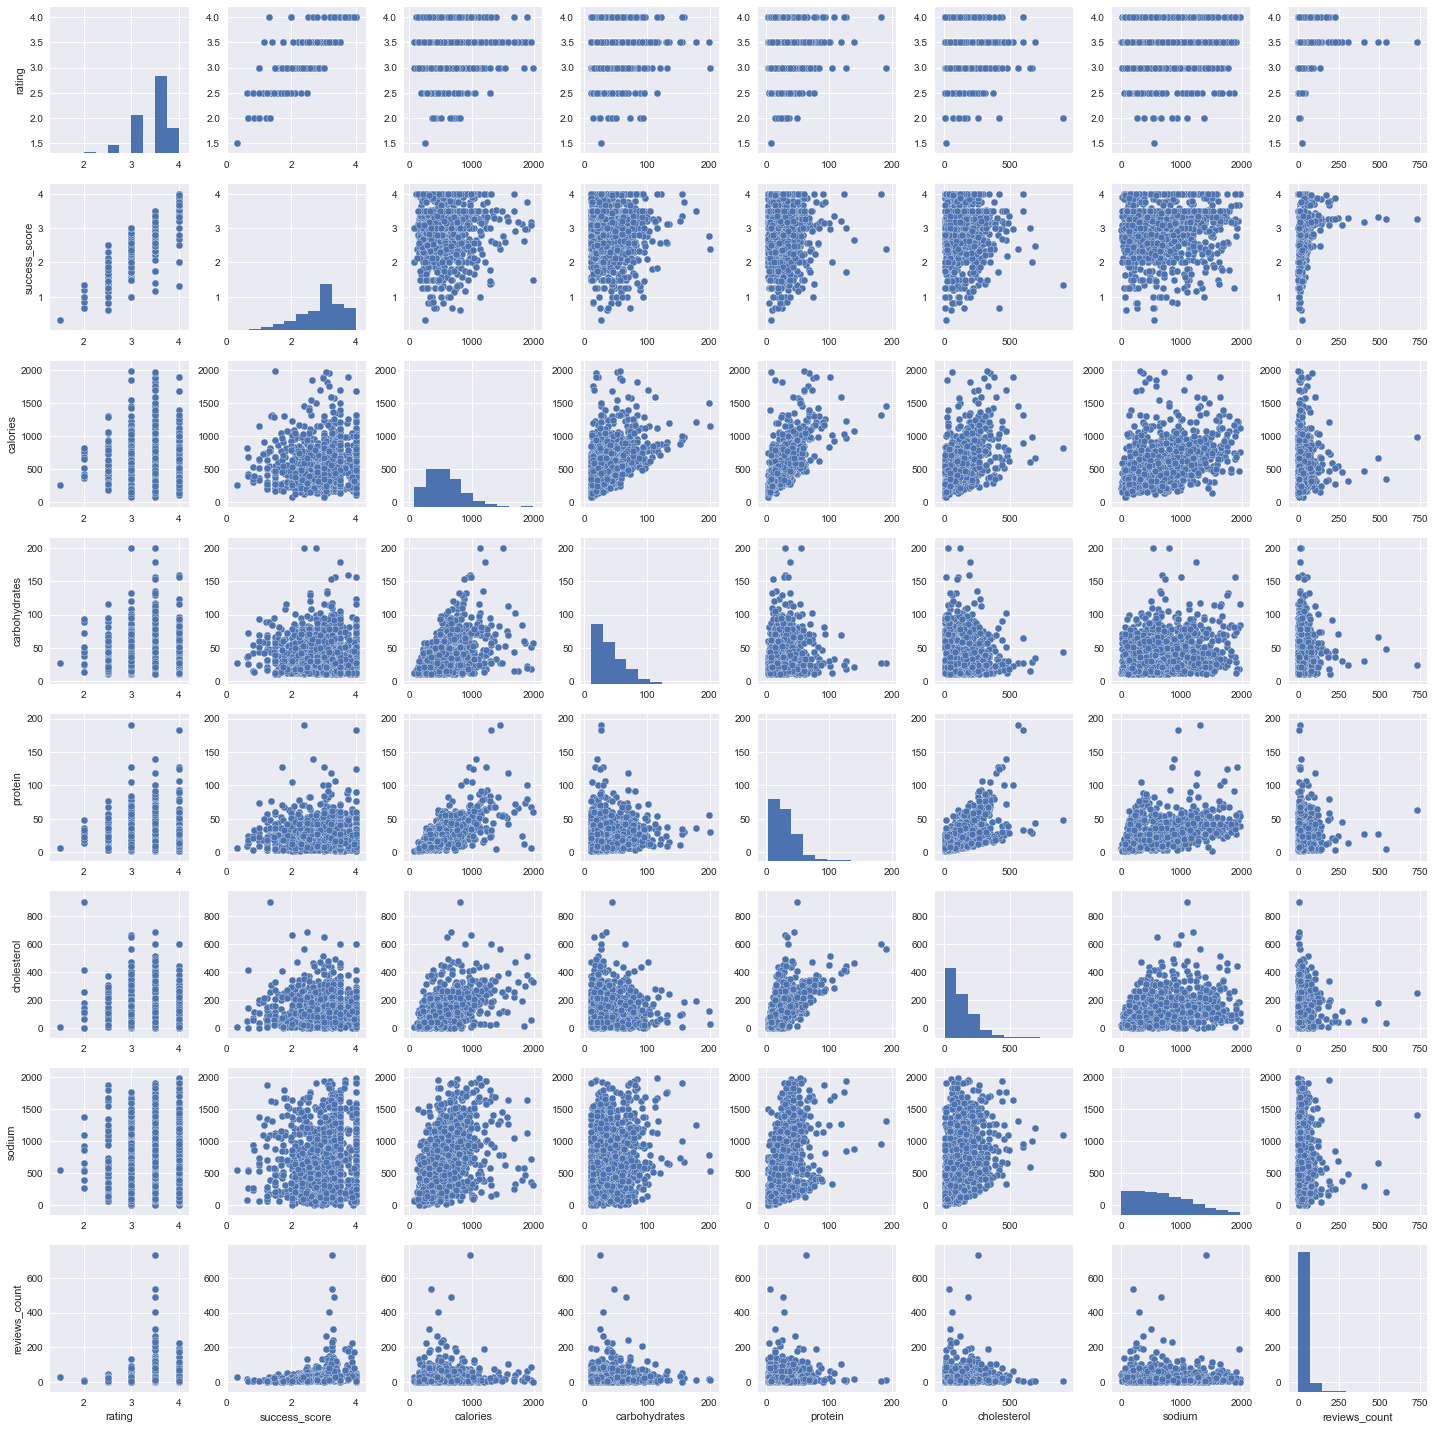

In [324]:
sns.pairplot(df_pre[['rating','success_score','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count']])

Text(0.5,1,'Calories')

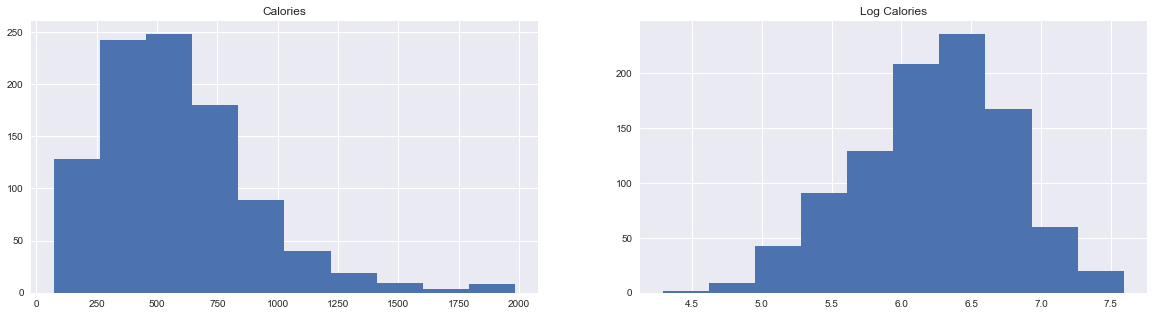

In [445]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 2)
plt.hist(df['log_calories'])
plt.title('Log Calories')

    
plt.subplot(1, 2, 1)
residual = pred - y_test
plt.hist(df['calories'])
plt.title('Calories')

## Features Selection

In [417]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE
X = df_pre.drop(['rating','url','date','make_it_again','success_score'], axis =1)
y = df_pre['rating']

model = LinearRegression()
# create the RFE model and select 50 features
rfe = RFE(model, 50)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
selected_features_ranking = list(zip(X.columns,rfe.support_,rfe.ranking_))

In [418]:
#create a new dataframe with only features selected by RFE
selected_features = [i[0] for i in selected_features_ranking if i[1] == True]
selected_features_df = pd.DataFrame()
for i in selected_features:
    selected_features_df[i] = df_pre[i]

In [419]:
df = pd.merge(df_pre[['success_score','rating','url','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count','cooking_time']].reset_index(), selected_features_df.reset_index(), on = 'index', how='inner').set_index('index')
df.dropna(inplace=True)

In [420]:
df['log_calories'] = np.log(df['calories'])
df['log_carbohydrates'] = np.log(df['carbohydrates'])
df['log_protein'] = np.log(df['protein'])
df['log_cholesterol'] = np.log(df['cholesterol'])
df['log_sodium'] = np.log(df['sodium'])

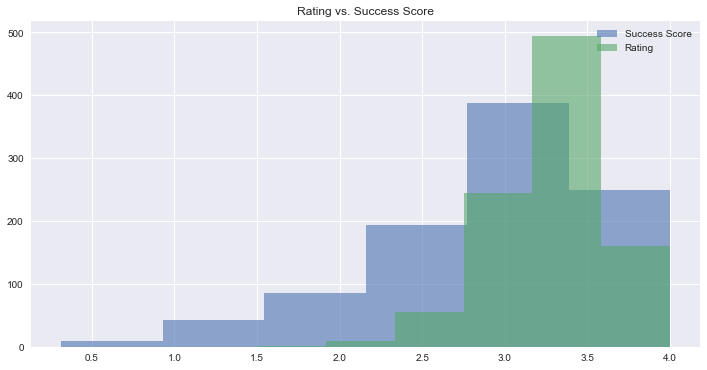

In [421]:
plt.figure(figsize=(12,6))
plt.hist(df['success_score'], bins = 6, alpha=0.6, label='Success Score')
plt.hist(df['rating'], bins = 6, alpha=0.6, label='Rating')
plt.legend(loc='upper right')
plt.title('Rating vs. Success Score')
plt.show()

## Regression Model

### Linear Regression for Success score on all features

In [433]:
X = df.drop(['rating','success_score','url','reviews_count','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'cooking_time'], axis =1)
y = df['success_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lm = sm.OLS(y_train, X_train)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_score   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     216.8
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        18:44:32   Log-Likelihood:                -693.53
No. Observations:                 676   AIC:                             1497.
Df Residuals:                     621   BIC:                             1745.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Lemon                        0.2326      0.206      1.127      0.260      -0.173       0.638
Pepper                      -0.2415      0.164     -1.476      0.140      -0.563       0.080
Green Bean                  -0.1680      0.242     -0.694      0.488      -0.643       0.307
Cheddar                     -0.2989      0.192     -1.555      0.120      -0.676       0.079
Root Vegetable               0.3507      0.174      2.017      0.044       0.009       0.692
Chile Pepper                 0.1784      0.189      0.942      0.347      -0.194       0.551
Mint                         0.4184      0.199      2.105      0.036       0.028       0.809
Ham                          0.0734      0.203      0.362      0.718      -0.325       0.472
Squash                      -0.4904      0.232     -2.117      0.035      -0.945      -0.035
Salmon                       0.1646      0.254      0.647      0.518      -0.335       0.664
Walnut                      -0.6105      0.243     -2.509      0.012      -1.088      -0.133
Mayonnaise                  -0.0172      0.206     -0.083      0.933      -0.421       0.387
Feta                         0.4938      0.208      2.370      0.018       0.085       0.903
Lentil                       0.4329      0.278      1.558      0.120      -0.113       0.979
Breadcrumbs                 -0.1118      0.244     -0.458      0.647      -0.591       0.368
Shallot                      0.1946      0.244      0.796      0.426      -0.285       0.674
Pine Nut                    -0.5652      0.264     -2.141      0.033      -1.084      -0.047
Goat Cheese                  0.6643      0.276      2.404      0.017       0.122       1.207
Coconut                     -0.5918      0.277     -2.136      0.033      -1.136      -0.048
Lemon Juice                 -0.2171      0.310     -0.700      0.484      -0.826       0.392
Phyllo/Puff Pastry Dough    -0.0731      0.327     -0.224      0.823      -0.715       0.569
Oat                          0.1834      0.437      0.419      0.675      -0.676       1.042
Berry                        0.6234      0.338      1.843      0.066      -0.041       1.288
Coriander                    0.3299      0.363      0.909      0.364      -0.383       1.043
Duck                         0.1864      0.330      0.565      0.572      -0.461       0.834
Cauliflower                  0.2270      0.435      0.522      0.602      -0.628       1.082
Celery                       0.3038      0.280      1.084      0.279      -0.247       0.854
Jam or Jelly                -0.4385      0.435     -1.008      0.314      -1.293       0.416
Cranberry                    0.2029      0.333      0.610      0.542      -0.450       0.856
Monterey Jack                0.2076      0.411      0.504      0.614      -0.601       1.016
Pistachio     

In [423]:
from sklearn import metrics
predictions = fit.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.604000383685
MSE: 0.58972699589
RMSE: 0.767936843685


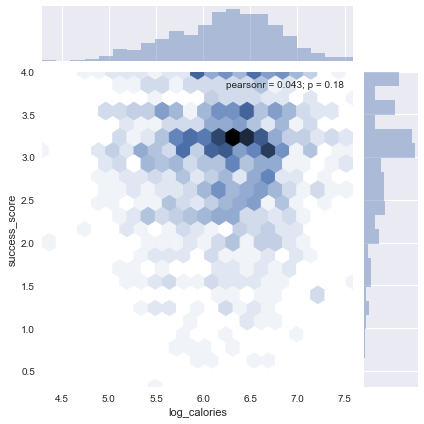

In [424]:
sns.jointplot(x=X['log_calories'],y=y,kind='hex',data=df)

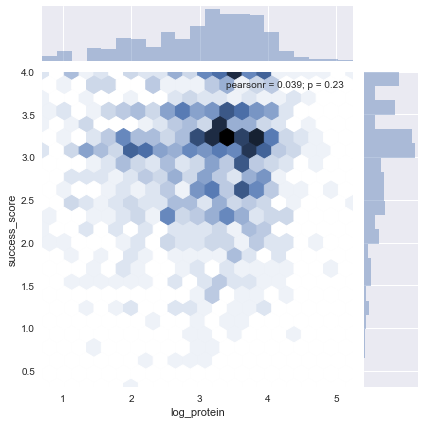

In [425]:
sns.jointplot(x=X['log_protein'],y=y,kind='hex',data=df)

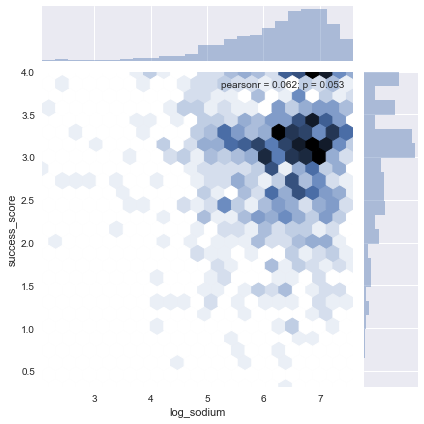

In [426]:
sns.jointplot(x=X['log_sodium'],y=y,kind='hex',data=df)

### Homoscedascity analysis

Text(0,0.5,'y')

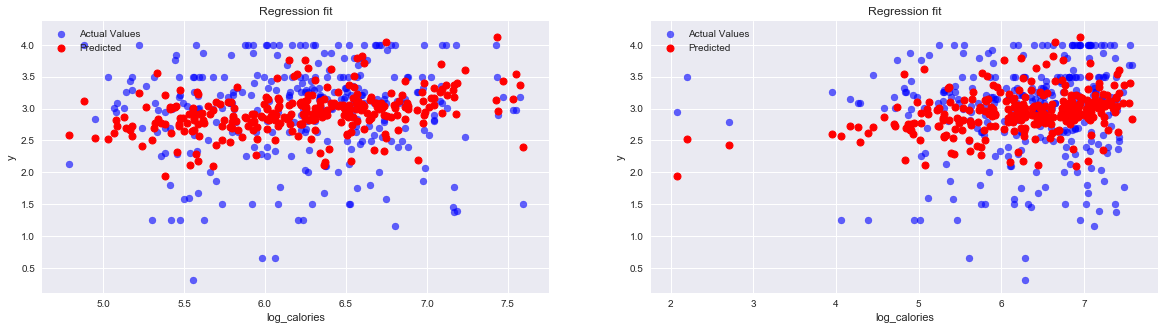

In [427]:
pred = fit.predict(X_test)
residual = fit.predict(X_test) - y_test

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.scatter(X_test['log_calories'],y_test, color = 'blue', label='Actual Values', alpha = 0.6)
plt.scatter(X_test['log_calories'], pred, color='red',linewidth=1, label='Predicted')
plt.title("Regression fit")
plt.legend(loc='upper left')
plt.xlabel("log_calories")
plt.ylabel("y")

plt.subplot(1, 2, 2)
plt.scatter(X_test['log_sodium'],y_test, color = 'blue', label='Actual Values', alpha = 0.6)
plt.scatter(X_test['log_sodium'], pred, color='red',linewidth=1, label='Predicted')
plt.title("Regression fit")
plt.legend(loc='upper left')
plt.xlabel("log_calories")
plt.ylabel("y")

Text(0,0.5,'residuals')

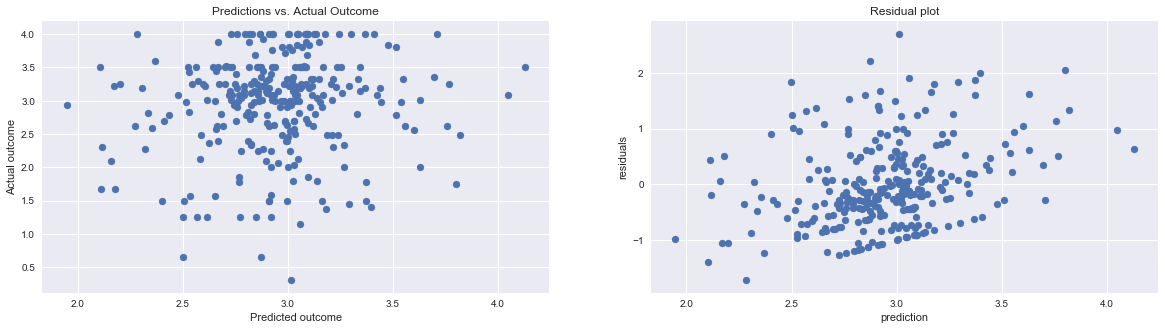

In [428]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.scatter(predictions, y_test)
plt.title('Predictions vs. Actual Outcome')
#plt.axis((0,5,0,5))
plt.ylabel('Actual outcome')
plt.xlabel('Predicted outcome')
    
plt.subplot(1, 2, 2)
residual = pred - y_test
plt.scatter(pred, residual)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

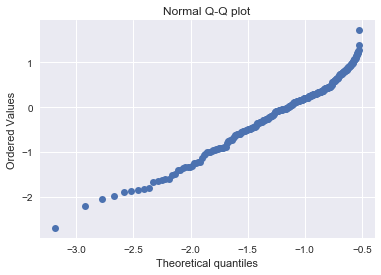

In [429]:
from scipy import stats
df['predict']=fit.predict(X_test)
df['resid']=y_test-df.predict
# We can diagnose/ inspect our residual normality assumption using qqplot:
stats.probplot(df['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [430]:
df = df.drop(['predict','resid'], 1)

Text(0,0.5,'Residuals')

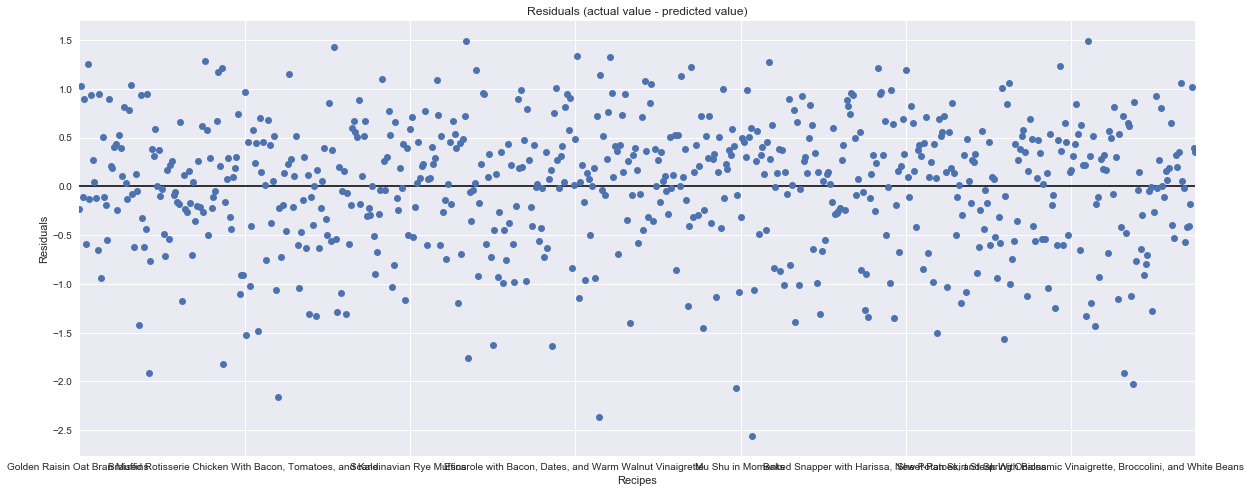

In [431]:
fit.resid.plot(style='o', figsize=(20,8))
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residuals (actual value - predicted value)')
plt.xlabel('Recipes')
plt.ylabel('Residuals')

#### Residual Histogram

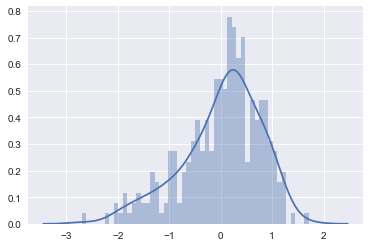

In [432]:
#residuals normal distributed
sns.distplot((y_test-predictions),bins=50);

In [439]:
# Linear Regression 2

X = df.drop(['rating','success_score','url','reviews_count','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'cooking_time',  'Pepper', 'Green Bean', 'Ham', 'Mayonnaise', 'Phyllo/Puff Pastry Dough','Coriander', 'Jam or Jelly', 'Banana', 'Pork Rib', 'log_cholesterol', 'Duck', 'Cauliflower', 'Lemon Juice', 'Root Vegetable', 'Radicchio', 'Whole Wheat', 'Raspberry', 'Oregano', 'Mussel','Vanilla','Berry', 'Salmon', 'Fontina', 'Lamb Chop'], axis =1)
y = df['success_score']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3)

lm2 = sm.OLS(y_train2, X_train2)
fit2 = lm2.fit()
fit2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_score   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     406.0
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        18:47:23   Log-Likelihood:                -685.96
No. Observations:                 676   AIC:                             1434.
Df Residuals:                     645   BIC:                             1574.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Lemon                 0.1668      0.162      1.026      0.305      -0.152       0.486
Cheddar              -0.5431      0.219     -2.484      0.013      -0.972      -0.114
Chile Pepper          0.3609      0.195      1.854      0.064      -0.021       0.743
Mint                  0.3828      0.199      1.923      0.055      -0.008       0.774
Squash               -0.4907      0.225     -2.184      0.029      -0.932      -0.050
Walnut               -0.2560      0.224     -1.141      0.254      -0.697       0.185
Feta                  0.4960      0.219      2.268      0.024       0.066       0.925
Lentil                0.5507      0.263      2.094      0.037       0.034       1.067
Breadcrumbs          -0.2509      0.208     -1.204      0.229      -0.660       0.158
Shallot               0.3531      0.232      1.521      0.129      -0.103       0.809
Pine Nut             -0.4683      0.246     -1.906      0.057      -0.951       0.014
Goat Cheese           0.4758      0.230      2.067      0.039       0.024       0.928
Coconut              -0.6592      0.283     -2.334      0.020      -1.214      -0.104
Oat                   0.3440      0.346      0.996      0.320      -0.334       1.023
Celery               -0.2867      0.310     -0.925      0.355      -0.895       0.322
Cranberry             0.1484      0.313      0.474      0.636      -0.466       0.763
Monterey Jack         0.3237      0.281      1.152      0.250      -0.228       0.875
Pistachio             0.2090      0.417      0.502      0.616      -0.609       1.027
Pineapple            -0.2640      0.282     -0.936      0.350      -0.818       0.290
Prune                 0.1699      0.343      0.495      0.621      -0.505       0.844
Grains                0.4954      0.365      1.358      0.175      -0.221       1.212
Ground Lamb           0.6991      0.367      1.907      0.057      -0.021       1.419
Nutmeg               -0.1011      0.350     -0.289      0.773      -0.789       0.586
Pear                  0.8663      0.344      2.519      0.012       0.191       1.542
Orange Juice         -1.1135      0.685     -1.625      0.105      -2.459       0.232
Okra                 -0.1099      0.343     -0.320      0.749      -0.784       0.564
Trout                -0.0652      0.399     -0.164      0.870      -0.848       0.718
log_calories          0.5571      0.051     10.922      0.000       0.457       0.657
log_carbohydrates    -0.1748      0.054     -3.230      0.001      -0.281      -0.069
log_protein          -0.2451      0.044     -5.519      0.000      -0.332      -0.158
log_sodium            0.1288      0.034      3.777      0.000       0.062       0.196
==============================================================================
Omnibus:                       50.317   Durbin-Watson:                   2.092
P

Text(0,0.5,'y')

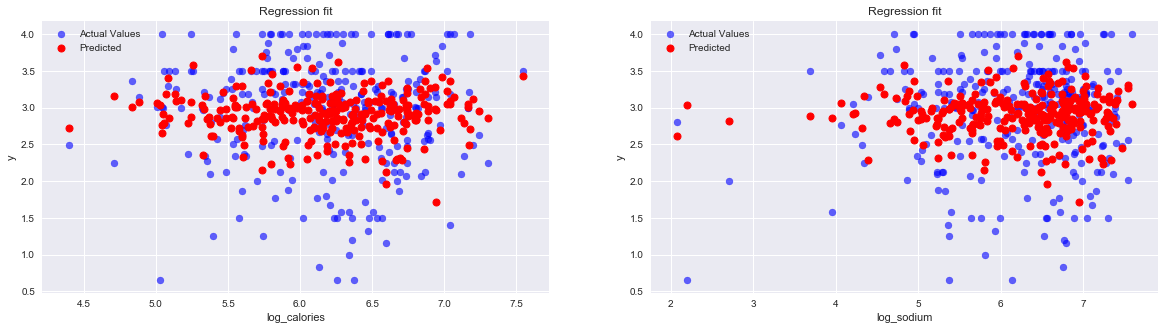

In [450]:
pred2 = fit2.predict(X_test2)
residual = fit2.predict(X_test2) - y_test2

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.scatter(X_test['log_calories'],y_test2, color = 'blue', label='Actual Values', alpha = 0.6)
plt.scatter(X_test['log_calories'], pred2, color='red',linewidth=1, label='Predicted')
plt.title("Regression fit")
plt.legend(loc='upper left')
plt.xlabel("log_calories")
plt.ylabel("y")

plt.subplot(1, 2, 2)
plt.scatter(X_test['log_sodium'],y_test2, color = 'blue', label='Actual Values', alpha = 0.6)
plt.scatter(X_test['log_sodium'], pred2, color='red',linewidth=1, label='Predicted')
plt.title("Regression fit")
plt.legend(loc='upper left')
plt.xlabel("log_sodium")
plt.ylabel("y")

Text(0,0.5,'residuals')

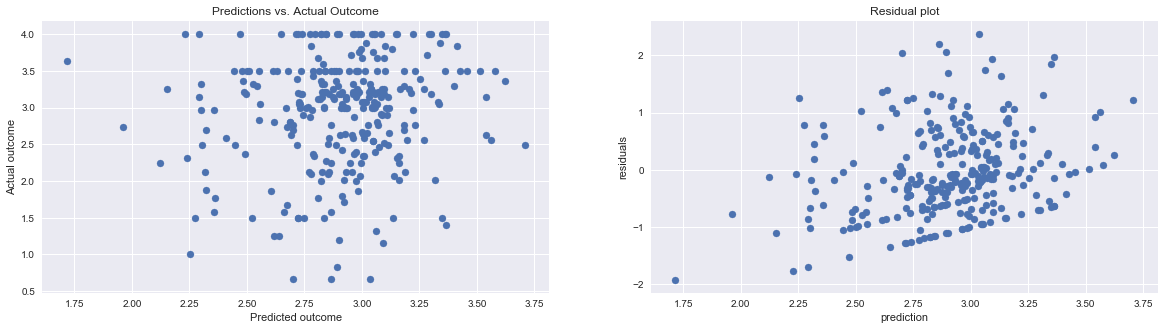

In [441]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.scatter(pred2, y_test2)
plt.title('Predictions vs. Actual Outcome')
#plt.axis((0,5,0,5))
plt.ylabel('Actual outcome')
plt.xlabel('Predicted outcome')
    
plt.subplot(1, 2, 2)
residual2 = pred2 - y_test2
plt.scatter(pred2, residual2)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

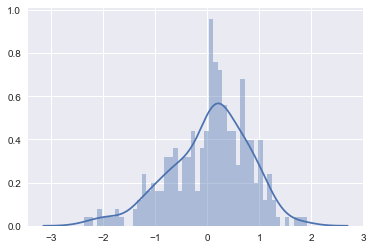

In [449]:
#residuals normal distributed
sns.distplot((y_test2-pred2),bins=50);

In [474]:
from sklearn import metrics
predictions2 = fit2.predict(X_test2)
print('MAE:', metrics.mean_absolute_error(y_test2, predictions2))
print('MSE:', metrics.mean_squared_error(y_test2, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions2)))

MAE: 0.599874783148
MSE: 0.576009854291
RMSE: 0.758953130497


In [382]:
lm = LinearRegression()
lm.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [383]:
# print the intercept
print(lm.intercept_)

2.37186708927


In [384]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Egg,-0.200540
Nut,0.179252
Lemon,0.045907
Yogurt,-0.273513
Cheddar,-0.169441
Mint,0.145100
Almond,-0.161271
Squash,-0.093343
Walnut,-0.551493
Feta,0.422709


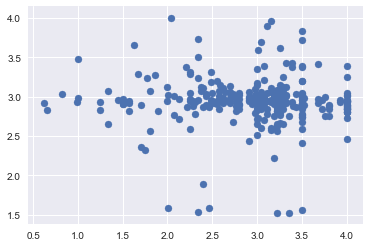

In [386]:
predictions = lm.predict(X_test2)
plt.scatter(y_test,predictions)

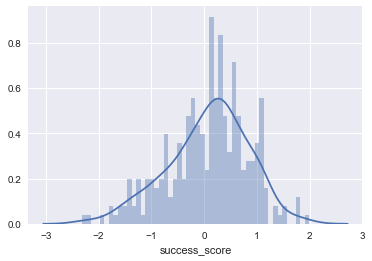

In [364]:
sns.distplot((y_test-predictions),bins=50);